In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [3]:
np.__version__

'1.26.4'

In [4]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [5]:
train_set_x_orig.shape, test_set_x_orig.shape

((209, 64, 64, 3), (50, 64, 64, 3))

In [6]:
train_set_y.shape

(1, 209)

y = [0], it's a 'non-cat' picture.


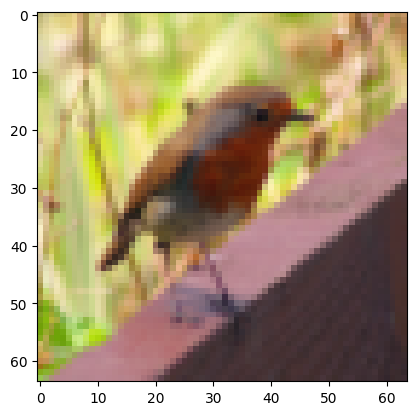

In [7]:
# Example of a picture
index = 10
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

y = [1], it's a 'cat' picture.


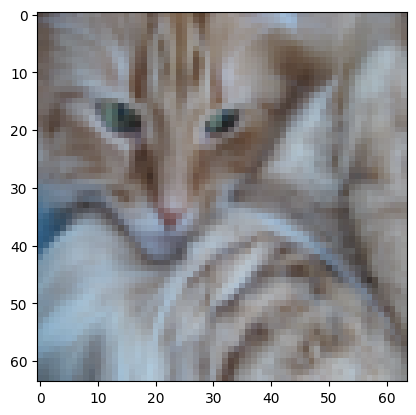

In [8]:
# Example of a picture
index = 2
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [9]:
train_set_y

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [10]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [11]:
X_train = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T / 255.0
X_test = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T / 255.0

X_train.shape, X_test.shape #(X_train shape (n, m))

((12288, 209), (12288, 50))

In [12]:
y_train, y_test = train_set_y, test_set_y
y_train.shape, y_test.shape

((1, 209), (1, 50))

In [13]:
nx = X_train.shape[0]
nx

12288

In [14]:
# let's define the sigmoid function

def sigmoid(z):
    g = 1. / (1. + np.exp(-z))
    return g

In [15]:
# let's define a function for forward and backward propagation

def propagation(w, b, X, y, m=m_train):
    z = np.dot(w.T, X) + b
    a = sigmoid(z)
    
    # let's define the cost
    first_term = np.sum(y * np.log(a))
    second_term = np.sum(((1-y) * np.log(1-a)))
    
    cost = (-1./m) * (first_term + second_term)
    
    # now, let's calculate the gradients
    # a - y
    diff = a - y
    
    dW = (1./m) * np.dot(X, diff.T)
    db = (1./m) * np.sum(diff)
    
    gradients = {
        "dW": dW, 
        "db": db
    }
    
    return cost, gradients

In [16]:
# let's initialize the parameters w and b
# w = np.random.rand(nx, 1)
# b = np.random.rand(1)
# b.shape, w.shape

In [17]:
# propagation(w=w, b=b, X=X_train, y=y_train)

In [18]:
# let's define the optimizer

def optimizer(w, b, X, y, num_iteration, lr, print_cost=True):
    costs = []
    
    for i in range(num_iteration):
        cost, gradients = propagation(w=w, b=b, X=X, y=y)
        
        if print_cost and (i % 10) == 0:
            print(f"Cost at {i}th iteration is: {cost}")
            print(f"W: {w.T} | b: {b}\n")
        
        w = w - (lr * gradients['dW'])
        b = b - (lr * gradients['db'])
        
        costs.append(cost)
    
    opt_parameters = {
        "W": w,
        "b": b
    }
    
    return costs, opt_parameters

In [19]:
# let's initialize the parameters w and b with zeros
w = np.zeros((nx, 1))
b = np.zeros(1)

n_iterations = 5000

costs, opt_params = optimizer(w=w, 
                                b=b, 
                                X=X_train, 
                                y=y_train, 
                                num_iteration=n_iterations,
                                lr=0.005)

Cost at 0th iteration is: 0.6931471805599453
W: [[0. 0. 0. ... 0. 0. 0.]] | b: [0.]

Cost at 10th iteration is: 0.7449403578103342
W: [[ 5.29611662e-04 -1.64251170e-04  1.55215966e-04 ... -1.49947612e-05
  -4.94230824e-04  4.51770829e-04]] | b: [-0.00044001]

Cost at 20th iteration is: 0.719248930310633
W: [[ 0.00089363 -0.00045305  0.00013939 ... -0.00016707 -0.00107125
   0.00076012]] | b: [-0.00090022]

Cost at 30th iteration is: 0.6973357819554408
W: [[ 1.20331986e-03 -7.58457849e-04  7.20486249e-05 ... -3.55864768e-04
  -1.64314956e-03  1.02420984e-03]] | b: [-0.00128483]

Cost at 40th iteration is: 0.6778142256553419
W: [[ 1.47413184e-03 -1.07024100e-03 -2.71328307e-05 ... -5.63863399e-04
  -2.20109148e-03  1.26345494e-03]] | b: [-0.00162445]

Cost at 50th iteration is: 0.6599250465088032
W: [[ 0.00171526 -0.00138338 -0.00014697 ... -0.0007802  -0.00274051
   0.00148927]] | b: [-0.00193699]

Cost at 60th iteration is: 0.643247578333392
W: [[ 0.00193262 -0.00169535 -0.00028068 ...

In [20]:
opt_params

{'W': array([[ 0.01386645],
        [-0.03823838],
        [-0.01725635],
        ...,
        [-0.01586452],
        [-0.03935553],
        [ 0.03788949]]),
 'b': array([-0.01282943])}

In [21]:

# Plot the cost over iterations
def plot_cost_over_iterations(n_iterations, costs):
    
    plt.figure(figsize=(6, 4))  # Set the figure size

    # Plot the costs over iterations
    plt.plot(range(n_iterations), costs, color='b', linewidth=2, label='Cost')

    # Customizing the plot
    plt.xlabel('Iterations', fontsize=10)
    plt.ylabel('Cost', fontsize=10)
    plt.title(f'Cost Function Over Iterations', fontsize=12)
    
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid for better readability
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Add a legend
    plt.legend(loc='best', fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()

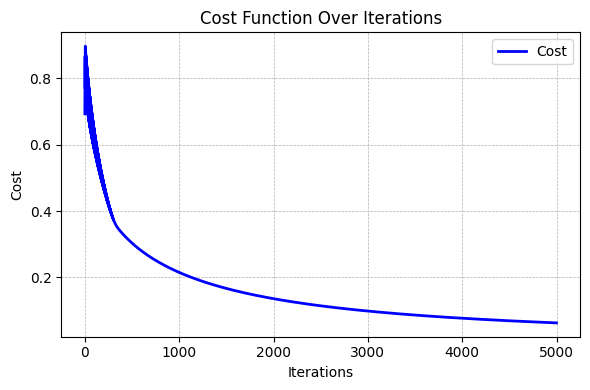

In [22]:
plot_cost_over_iterations(n_iterations=n_iterations, costs=costs)

In [23]:
y_pred = sigmoid(np.dot(opt_params['W'].T, X_test) + opt_params['b']) > 0.5
y_pred

array([[ True,  True,  True,  True,  True,  True, False,  True,  True,
         True, False, False,  True,  True, False,  True, False,  True,
        False, False,  True, False, False,  True,  True,  True,  True,
        False, False,  True, False,  True,  True,  True,  True, False,
        False,  True, False, False,  True, False,  True, False,  True,
         True, False,  True,  True, False]])

In [24]:

def predict(w, b, X):
    a = sigmoid(np.dot(w.T, X) + b)
    y_pred = a > 0.5
    
    return y_pred

In [25]:
predict(w=opt_params['W'], b=opt_params['b'], X=X_test)

array([[ True,  True,  True,  True,  True,  True, False,  True,  True,
         True, False, False,  True,  True, False,  True, False,  True,
        False, False,  True, False, False,  True,  True,  True,  True,
        False, False,  True, False,  True,  True,  True,  True, False,
        False,  True, False, False,  True, False,  True, False,  True,
         True, False,  True,  True, False]])

In [26]:

def model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=0.005, print_cost=False):
    
    # let's initialize the parameters w and b with zeros
    w = np.zeros((X_train.shape[0], 1))
    b = np.zeros(1)

    # Gradient descent (≈ 1 line of code)
    costs, parameters = optimizer(
                                w=w, 
                                b=b, 
                                X=X_train, 
                                y=y_train, 
                                num_iteration=num_iterations, 
                                lr=learning_rate,  
                                print_cost=False
                            )
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["W"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    y_prediction_test = predict(w, b, X_test)
    y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

    
    d = {
            "costs": costs,
            "Y_prediction_test": y_prediction_test, 
            "Y_prediction_train" : y_prediction_train, 
            "w" : w, 
            "b" : b,
            "learning_rate" : learning_rate,
            "num_iterations": num_iterations}
    
    return d

In [27]:
%%time

n_iteration = 5000

report = model(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    num_iterations=n_iterations,
    learning_rate=0.001
)

train accuracy: 96.65071770334929 %
test accuracy: 74.0 %
CPU times: total: 25.8 s
Wall time: 7 s
